In [2]:
from pylab import *
%matplotlib inline


In [3]:
def raiz_bip(func,x_i,x_d,y_fija): # la unica modificacion a este buscador de raices es que se le agrego una variable
    err=1e-8                       # y_fija, buscaremos un raiz manteniendo contante un valor de y
    raiz = 0.5*(x_i+x_d)
    y_i,y_d = func(x_i,y_fija),func(x_d,y_fija)
    while abs(y_d)>=err:
        y_m = func(raiz,y_fija)
        if y_m == 0.:
            print "chin, le atine :D"
            break
        if y_m*y_i < 0:
            x_d = raiz
        else:
            x_i = raiz
        raiz = 0.5*(x_i+x_d)
        y_i,y_d = func(x_i,y_fija),func(x_d,y_fija)
    return raiz

Se tiene la siguiente funcíon:$$ f(x,y) = (2exp(-(x+1)^2))(exp(-(y+2)^2) + exp(-(y-2)^2)) + 6x(x^2 + y^2)exp(-(x^2+y^2)) -1 $$

In [4]:
def funcion(x,y): # se define la funcíon
    return (2*exp(-(x+1)**2))*(exp(-(y+2)**2) + exp(-(y-2)**2)) + 6*x*(x**2 + y**2)*exp(-(x**2+y**2)) -1

In [5]:
def raiz_osc(funcion,x_in,x_fi,y_in,y_fi): # es basicamente el buscador de raices del programa enterior, unas modifcacioes   
    fmin = 1e-3                            # se agregaron y_in y_fi  que es el intevalo en y en el cual se buscan las raices 
    y_fija = y_in + fmin # se define el punto fijo en y como el primer punto del intevalo y mas f min
    while y_fija < y_fi: # mientras esta y fija sea menor al punto final del intevalo original en y se mantiene el ciclo
        x_ini,x_fin = x_in,x_in + fmin # de aqui en adelante el algoritmo es el mismo que en el programa del inciso anterior
        n=0
        i=0
        while (x_fin < x_fi):
            y_i,y_d = funcion(x_ini,y_fija),funcion(x_fin,y_fija) # la funcion toma el valor de y fija
            p = y_i*y_d
            while (p>0):
                x_fin = x_fin + fmin
                if ( x_fin > x_fi):
                    i =1
                    break
                y_i,y_d = funcion(x_ini,y_fija),funcion(x_fin,y_fija)
                p = y_i*y_d
            if i == 1 and n > 0:
                break
            if i == 1:    
                break
            else :    
                raiz = raiz_bip(funcion,x_ini,x_fin,y_fija)
                n += 1
                x_ini = x_fin
                x_fin = x_fin + fmin
            xlim(-4,4),ylim(-4,4)    # definimos el intevalo de la grafica
            plot(raiz,y_fija,'.',color = 'blue') # en este punto graficamos las raices encontradas para y fija
        y_fija = y_fija + fmin # a y fija se le suma fmin y se inicia un nuevo ciclo para esta nueva y fija
   
    

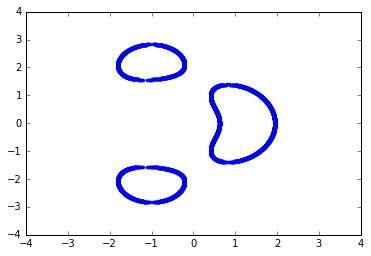

In [6]:
raiz_osc(funcion,-4,4,-4,4) # se corre el programa, como fmin es muy pequeña se obtiene un barrido fino 
                            # para la curva de nivel, aunque tarda mucho tiempo
